Sojeong Yang<br>
CSC 478 Assignment 4

## 1. PCA for Reduced Dimensionality in Clustering

<h3>a.</h3> 

**Load in the image data matrix, load in the numeric class labels from the segmentation class file:**

In [51]:
import numpy as np
import pandas as pd
import pylab as pl

In [52]:
# 19 column names
names = pd.read_csv('./segmentation_data/segmentation_names.txt', header=None)
names

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2
5,VEDGE-MEAN
6,VEDGE-SD
7,HEDGE-MEAN
8,HEDGE-SD
9,INTENSITY-MEAN


In [53]:
# data with (0-18) columns
dt = pd.read_csv('./segmentation_data/segmentation_data.txt', header=None)
dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [54]:
# classes
classes = pd.read_csv('./segmentation_data/segmentation_classes.txt', header=None, sep='\t')
classes

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0
...,...,...
2095,CEMENT,3
2096,CEMENT,3
2097,CEMENT,3
2098,CEMENT,3


**Perform min-max normalizaion on the data matrix so that each feature is scaled to [0,1] range:**

In [68]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(dt)
dt_norm = min_max_scaler.transform(dt)

np.set_printoptions(precision=3, suppress=True)
dt_norm

array([[0.431, 0.742, 0.   , ..., 0.124, 0.508, 0.832],
       [0.336, 0.733, 0.   , ..., 0.127, 0.463, 0.837],
       [0.885, 0.971, 0.   , ..., 0.113, 0.48 , 0.845],
       ...,
       [0.502, 0.625, 0.   , ..., 0.072, 0.541, 0.176],
       [0.589, 0.613, 0.   , ..., 0.081, 0.503, 0.185],
       [0.486, 0.629, 0.   , ..., 0.096, 0.48 , 0.17 ]])

<h3> b. </h3>

**Using Kmeans implementation in scikit-learn, perform clustering on the image data (use K=7 in your clustering)::**

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1) # initialization
kmeans.fit(dt_norm)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 409.70644990612413
start iteration
done sorting
end inner loop
Iteration 1, inertia 401.13845432174105
start iteration
done sorting
end inner loop
Iteration 2, inertia 400.3585766012935
start iteration
done sorting
end inner loop
Iteration 3, inertia 399.4181985295721
start iteration
done sorting
end inner loop
Iteration 4, inertia 398.2503239866979
start iteration
done sorting
end inner loop
Iteration 5, inertia 397.45575929538006
start iteration
done sorting
end inner loop
Iteration 6, inertia 395.9737298367512
start iteration
done sorting
end inner loop
Iteration 7, inertia 394.0709298514105
start iteration
done sorting
end inner loop
Iteration 8, inertia 392.6164547488405
start iteration
done sorting
end inner loop
Iteration 9, inertia 390.21212638096006
start iteration
done sorting
end inner loop
Iteration 10, inertia 385.9366823275452
start iteration
done sorting
end inner loop
Iteration 11, 

Iteration 9, inertia 370.133894363103
start iteration
done sorting
end inner loop
Iteration 10, inertia 369.91379543577585
start iteration
done sorting
end inner loop
Iteration 11, inertia 369.86528266029626
start iteration
done sorting
end inner loop
Iteration 12, inertia 369.85888642081807
start iteration
done sorting
end inner loop
Iteration 13, inertia 369.85888642081807
center shift 0.000000e+00 within tolerance 4.150157e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 429.57326707405514
start iteration
done sorting
end inner loop
Iteration 1, inertia 407.42692007675896
start iteration
done sorting
end inner loop
Iteration 2, inertia 404.33262564053905
start iteration
done sorting
end inner loop
Iteration 3, inertia 403.43544947926495
start iteration
done sorting
end inner loop
Iteration 4, inertia 403.25582250635216
start iteration
done sorting
end inner loop
Iteration 5, inertia 403.16886620129316
start iteration
done sorting
end inner

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [70]:
clusters = kmeans.predict(dt_norm)
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,3
1,3
2,3
3,3
4,3
...,...
2095,1
2096,2
2097,5
2098,5


In [71]:
index_name = names[0].tolist()
index_name

['REGION-CENTROID-COL',
 'REGION-CENTROID-ROW',
 'REGION-PIXEL-COUNT',
 'SHORT-LINE-DENSITY-5',
 'SHORT-LINE-DENSITY-2',
 'VEDGE-MEAN',
 'VEDGE-SD',
 'HEDGE-MEAN',
 'HEDGE-SD',
 'INTENSITY-MEAN',
 'RAWRED-MEAN',
 'RAWBLUE-MEAN',
 'RAWGREEN-MEAN',
 'EXRED-MEAN',
 'EXBLUE-MEAN',
 'EXGREEN-MEAN',
 'VALUE-MEAN',
 'SATURATION-MEAN',
 'HUE-MEAN']

**Print the cluster centroids:**

In [72]:
centroids = pd.DataFrame(kmeans.cluster_centers_.T, columns=['1','2','3','4','5','6','7'], index=index_name)
centroids

,1,2,3,4,5,6,7
REGION-CENTROID-COL,0.302506,0.253603,0.251678,0.513994,0.535099,0.769063,0.748274
REGION-CENTROID-ROW,0.530862,0.459865,0.392749,0.808937,0.150167,0.425930,0.532041
REGION-PIXEL-COUNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SHORT-LINE-DENSITY-5,0.052260,0.026346,0.075622,0.077441,0.027778,0.014024,0.039157
SHORT-LINE-DENSITY-2,0.046610,0.013746,0.019403,0.005051,0.001667,0.022654,0.037651
VEDGE-MEAN,0.100817,0.037337,0.077657,0.054474,0.030228,0.039702,0.113530
VEDGE-SD,0.009420,0.002370,0.004149,0.001407,0.000543,0.002983,0.018922
HEDGE-MEAN,0.083972,0.027901,0.061240,0.046335,0.026766,0.023116,0.107311
HEDGE-SD,0.011043,0.002022,0.005037,0.001401,0.000587,0.002094,0.017627
INTENSITY-MEAN,0.400608,0.025942,0.147428,0.108790,0.823246,0.040385,0.298573


**To evaluate your clusters, first perform Silhouette analysis on the clusters:**

In [73]:
from sklearn import metrics

silhouettes = metrics.silhouette_samples(dt_norm, clusters)
print(silhouettes[:20])

[0.572 0.561 0.465 0.496 0.572 0.56  0.542 0.412 0.52  0.468 0.487 0.491 0.584 0.563 0.379 0.531
 0.548 0.423 0.416 0.404]


In [74]:
print(silhouettes.mean())

0.3320742908894385


**Visualization of the Silhouettes:**

In [75]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def plot_silhouettes(dt_norm, clusters, metric='euclidean'):
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(dt_norm, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        
        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color='red', linestyle='--')
    
    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')
    
    pl.tight_layout()
    pl.show()
    
    return

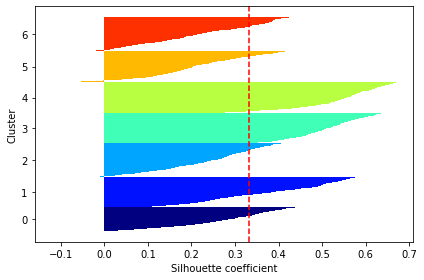

In [76]:
plot_silhouettes(dt_norm, clusters)

**Computing** `Completeness and Homogeneity` **values of the generated clusters:**

In [77]:
from sklearn.metrics import completeness_score, homogeneity_score

print("Completeness: ", completeness_score(classes[1], clusters))
print("Homogeneity : ", homogeneity_score(classes[1], clusters))

Completeness:  0.6117374684331665
Homogeneity :  0.6100499914689614


<h3>c. </h3>

**Perform PCA on the normalized image data matrix:**

In [78]:
from sklearn import decomposition

pca = decomposition.PCA(svd_solver='randomized')
XTrans = pca.fit_transform(dt_norm)

np.set_printoptions(precision=3, suppress=True)
print(XTrans)

[[-0.689  0.533  0.246 ... -0.     0.    -0.   ]
 [-0.667  0.511  0.338 ...  0.    -0.    -0.   ]
 [-0.712  0.771 -0.156 ...  0.     0.    -0.   ]
 ...
 [-0.508 -0.129 -0.082 ... -0.     0.     0.   ]
 [-0.479 -0.086 -0.159 ... -0.     0.     0.   ]
 [-0.442 -0.106 -0.047 ... -0.     0.     0.   ]]


In [79]:
print(pca.explained_variance_ratio_)

[0.607 0.132 0.101 0.045 0.035 0.02  0.019 0.016 0.011 0.007 0.004 0.002 0.    0.    0.    0.
 0.    0.    0.   ]


In [80]:
meanVals = np.mean(dt_norm, axis=0)
meanRemoved = dt_norm- meanVals
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=2, suppress=True, linewidth=100)
print(covMat)

[[ 0.08  0.    0.   -0.   -0.   -0.    0.   -0.    0.    0.    0.    0.01  0.01 -0.01  0.    0.
   0.01 -0.01  0.  ]
 [ 0.    0.06  0.    0.    0.    0.   -0.    0.   -0.   -0.03 -0.03 -0.03 -0.03  0.02 -0.02  0.02
  -0.03  0.    0.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.  ]
 [-0.    0.    0.    0.02 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.
  -0.   -0.    0.  ]
 [-0.    0.    0.   -0.    0.01  0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.
  -0.    0.   -0.  ]
 [-0.    0.    0.   -0.    0.    0.01  0.    0.    0.   -0.   -0.    0.   -0.   -0.    0.   -0.
   0.   -0.   -0.  ]
 [ 0.   -0.    0.   -0.    0.    0.    0.    0.    0.   -0.   -0.    0.    0.   -0.    0.    0.
   0.    0.   -0.  ]
 [-0.    0.    0.   -0.    0.    0.    0.    0.01  0.    0.    0.    0.    0.   -0.    0.   -0.
   0.   -0.   -0.  ]
 [ 0.   -0.    0.   -0.    0.    0.    0.    0.    0.    0.   

In [81]:
import numpy.linalg as la
eigVals, eigVects = la.eig(np.mat(covMat))
print("eigen Values: \n",eigVals)
print("eigen Vectors: \n", eigVects)

eigen Values: 
 [0.48 0.1  0.08 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
eigen Vectors: 
 [[ 0.03 -0.35  0.93  0.04  0.01 -0.03  0.01  0.03 -0.   -0.02 -0.01 -0.01  0.    0.    0.    0.
  -0.    0.    0.  ]
 [-0.19 -0.38 -0.12 -0.66  0.47 -0.14 -0.24  0.22  0.06  0.07  0.06  0.04  0.01 -0.01 -0.    0.
  -0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    1.  ]
 [-0.01 -0.03 -0.04 -0.03 -0.06 -0.6   0.72  0.32  0.06  0.08  0.01  0.01  0.   -0.   -0.    0.
   0.   -0.    0.  ]
 [-0.    0.02  0.01 -0.1   0.09  0.44  0.28  0.32 -0.77  0.05  0.07  0.   -0.01  0.    0.   -0.
  -0.   -0.    0.  ]
 [ 0.    0.02  0.01 -0.12  0.03  0.42  0.3   0.11  0.44 -0.34  0.55 -0.28  0.11 -0.01  0.    0.
  -0.    0.    0.  ]
 [ 0.    0.01  0.01 -0.01  0.01  0.18  0.12  0.07  0.18 -0.14  0.05  0.77 -0.55  0.01 -0.   -0.
  -0.   -0.    0.  ]
 [ 0.01  0.   -0.   -0.14  0.03  0.33  0.19  0.16  

In [82]:
eigValInd = np.argsort(eigVals) #sort, sort goes smallest to largest 
eigValInd = eigValInd[::-1] #reverse
sortedEigVals = eigVals[eigValInd]
print(sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
print(varPercentage)

[0.48 0.1  0.08 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[60.71 13.2  10.12  4.54  3.55  1.99  1.89  1.62  1.07  0.71  0.39  0.16  0.05  0.    0.    0.
  0.    0.    0.  ]


**Determine the number,** `r` **of PCs needed to capture** `at least 95% of variance` **in the data,<br>
provide a plot of PC variances:**

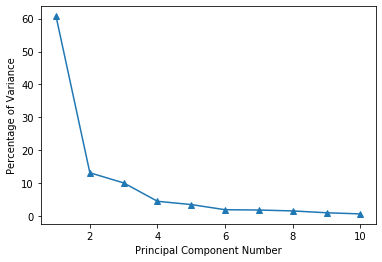

In [83]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), varPercentage[:10], marker='^') 
plt.xlabel('Principal Component Number') 
plt.ylabel('Percentage of Variance')
plt.show()

In [84]:
total_percentage = 0
for i in range(10):
    total_percentage += varPercentage[i]
    print("{}: {}".format(i+1, total_percentage))

1: 60.71423396853327
2: 73.91121320168926
3: 84.0349861425619
4: 88.57852534332585
5: 92.12588648109568
6: 94.11392197960622
7: 96.00589227704955
8: 97.62130108194515
9: 98.6869019336203
10: 99.39823945149531


**Use these r components as features to transform the data into a reduced dimension space:**

In [85]:
topNfeat = 7
topEigValInd = eigValInd[:topNfeat]
reducedEigVects = eigVects[:, topEigValInd]
reducedDT = np.dot(meanRemoved, reducedEigVects)
print(reducedDT)

[[-0.69 -0.53 -0.25 ...  0.08  0.05 -0.05]
 [-0.67 -0.51 -0.34 ...  0.04  0.06 -0.04]
 [-0.71 -0.77  0.16 ...  0.17  0.04 -0.06]
 ...
 [-0.51  0.13  0.08 ...  0.03 -0.03 -0.11]
 [-0.48  0.09  0.16 ... -0.   -0.   -0.09]
 [-0.44  0.11  0.05 ... -0.02 -0.21  0.15]]


<h3>d. </h3>

**Perform Kmeans again, but this time on the lower dimensional transformed data:**

In [86]:
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1)
kmeans.fit(reducedDT)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 334.4045316839721
start iteration
done sorting
end inner loop
Iteration 1, inertia 304.9952048863257
start iteration
done sorting
end inner loop
Iteration 2, inertia 296.3450238064758
start iteration
done sorting
end inner loop
Iteration 3, inertia 292.5118189091053
start iteration
done sorting
end inner loop
Iteration 4, inertia 289.79499463801903
start iteration
done sorting
end inner loop
Iteration 5, inertia 288.0230787767175
start iteration
done sorting
end inner loop
Iteration 6, inertia 287.1785623123024
start iteration
done sorting
end inner loop
Iteration 7, inertia 286.59970785220594
start iteration
done sorting
end inner loop
Iteration 8, inertia 286.4839373379839
start iteration
done sorting
end inner loop
Iteration 9, inertia 286.4542256121576
start iteration
done sorting
end inner loop
Iteration 10, inertia 286.4442670547258
start iteration
done sorting
end inner loop
Iteration 11, in

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [87]:
clusters= kmeans.predict(reducedDT)
clusters 

array([3, 3, 3, ..., 6, 6, 2], dtype=int32)

In [88]:
centroids = pd.DataFrame(kmeans.cluster_centers_ )
centroids

,0,1,2,3,4,5,6
0,-0.603705,0.355503,-0.109197,0.129799,0.130911,-0.021603,-0.043882
1,1.414527,-0.087223,-0.036765,0.173195,0.029922,-0.008973,-0.021573
2,-0.207423,0.246366,-0.152532,-0.056618,-0.130311,-0.005704,0.033045
3,-0.619268,-0.640250,-0.195829,0.086856,0.067760,0.008866,0.038372
4,0.176404,-0.043698,0.265370,-0.184124,-0.027075,0.024341,0.003264
5,0.435888,0.105299,-0.165257,-0.233499,0.045031,-0.007272,0.015049
6,-0.511579,0.064908,0.336145,0.065365,-0.078809,0.006240,-0.026261


**Compare Silhouette values as well as completeness and Homogeneity values of the new clusters:**

In [89]:
silhouettes = metrics.silhouette_samples(reducedDT, clusters)
print(silhouettes[:20])
print("Silhouettes Mean: ", silhouettes.mean())

[0.59 0.57 0.48 0.51 0.59 0.58 0.56 0.43 0.54 0.48 0.5  0.51 0.59 0.57 0.4  0.54 0.56 0.43 0.42
 0.43]
Silhouettes Mean:  0.35978002328686975


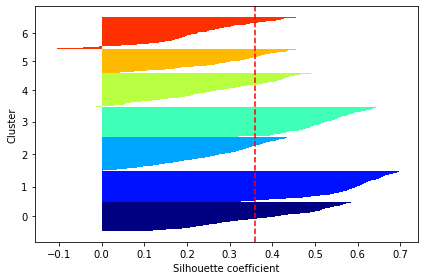

In [90]:
plot_silhouettes(reducedDT, clusters)

In [91]:
print("Completeness: ", completeness_score(classes[1], clusters))
print("Homogeneity : ", homogeneity_score(classes[1], clusters))

Completeness:  0.6110721173142059
Homogeneity :  0.6094646259197862


**Compare these results with those obtained on the full data in part b:**<br>

(full data)<br>
Completeness:  0.6117374684331665<br>
Homogeneity :  0.6100499914689614<br>
<br>
(new clusters)<br>
Completeness:  0.6107955063694608<br>
Homogeneity :  0.6091364049733291<br>
<br>
According to result in above, Completeness and Homgeneity from the full data and reduced Data shows similar and didn't see the big differences. Therefore, if we analyze big amounts of data, it's better to use the reduced data to improve the computaional speed. 

## 2. Item-Based Joke Recommendation

<h3>a. </h3>

**Load in the joke rating data and the joke test data into appropriate data structures:**

In [92]:
user_ratings = pd.read_csv("./jokes/modified_jester_data.csv", header=None)
user_ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.94,5.47,16.19,5.51,6.92,8.48,14.20,14.83,4.98,13.96,...,6.58,9.93,15.37,7.89,13.72,6.87,13.23,5.47,14.54,13.38
996,15.27,11.39,16.39,5.37,7.41,16.58,12.17,2.84,5.13,4.30,...,0.00,0.00,0.00,0.00,6.58,0.00,0.00,0.00,0.00,0.00
997,16.58,16.63,15.85,7.89,14.40,9.74,14.54,13.14,6.34,11.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
998,3.67,4.45,3.67,3.67,9.40,7.65,3.86,4.40,3.67,4.93,...,3.82,6.87,6.87,3.77,3.77,3.77,3.77,3.77,3.77,3.28


In [93]:
jokes = pd.read_csv("./jokes/jokes.csv", header=None, index_col=0)
jokes.columns = range(1)
jokes

,0
0,
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,Q. What's the difference between a man and a t...
4,Q. What's O. J. Simpson's Internet address? A....
...,...
95,Two attorneys went into a diner and ordered tw...
96,A teacher is explaining to her class how diffe...
97,Age and Womanhood1. Between the ages of 13 and...


**Use the "recommend" function to provide top 5 joke recommendation for at least 2 users.**<br>
**Use both standard item-based collaborative filtering (based on the rating prediction function "standEst") and <br>
the SVD-based version of the item-based CF (using "svdEst" as the prediction engine):**

In [94]:
def euclidSim(inA, inB):
    return 1.0/(1.0 + la.norm(inA - inB))

def pearsonSim(inA, inB):
    if len(inA) < 3 :
        return 1.0
    return 0.5+0.5*corrcoef(inA, inB, rowvar=0)[0][1]

def cosineSim(inA, inB):
    num = float(inA.T*inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5+0.5*(num/denom)

In [95]:
def cos_sim(x, D):
    a_norm = np.linalg.norm(x)
    b_norm = np.linalg.norm(D)
    sims = np.dot(x, D)/(a_norm * b_norm) # calculate similarity
    dists = 1 - sims
    return dists

In [96]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user, j]
        if userRating == 0:
            continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, dataMat[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(dataMat[overLap, item], dataMat[overLap, j])
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0:
        return 0
    else:
        return ratSimTotal/simTotal

In [97]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    data = mat(dataMat)
    U, Sigma, VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4])
    xformedItems = data.T * U[:,:4] * Sig4.I
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j == item:
            continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0:
        return 0
    else:
        return ratSimTotal/simTotal

In [98]:
def recommend(dataMat, user, N=3, simMeas=cosineSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1]
    if len(unratedItems)== 0:
        return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

**Generate recommendations for the two usersand show the text of the recommended jokes as well as the predicted rating for each:**

In [99]:
from numpy import *

D = np.mat(user_ratings)
user1 = 31

user1_recommend_stdEst = recommend(D, user1, N=5, simMeas=cosineSim, estMethod=standEst)
print(user1_recommend_stdEst)

[(79, 12.69433859440884), (97, 12.69382673446855), (82, 12.693416493041948), (99, 12.693121655424392), (78, 12.692513849286719)]


In [100]:
print("Recommended top 5 jokes for User", user1, "(standEst):\n") 
for i, p in user1_recommend_stdEst:
    print("* Joke", i, "with predicted rating:", p)
    print("-"*110)
    print(jokes[0][i],"\n")

Recommended top 5 jokes for User 31 (standEst):

* Joke 79 with predicted rating: 12.69433859440884
--------------------------------------------------------------------------------------------------------------
Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy." 

* Joke 97 with predicted rating: 12.69382673446855
--------------------------------------------------------------------------------------------------------------
Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 45 ... She is like America fully explored breathtakingly

In [101]:
user1_recommend_svdEst = recommend(D, user1, N=5, simMeas=cosineSim, estMethod=svdEst)
print(user1_recommend_svdEst)

[(99, 12.85435913389405), (78, 12.852551576070857), (72, 12.844608423598794), (79, 12.844421427249832), (76, 12.83634895653827)]


In [102]:
print("Recommended top 5 jokes for User", user1, "(svdEst):\n") 
for i, p in user1_recommend_svdEst:
    print("* Joke", i, "with predicted rating:", p)
    print("-"*110)
    print(jokes[0][i],"\n")

Recommended top 5 jokes for User 31 (svdEst):

* Joke 99 with predicted rating: 12.85435913389405
--------------------------------------------------------------------------------------------------------------
Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen. 

* Joke 78 with predicted rating: 12.852551576070857
--------------------------------------------------------------------------------------------------------------
Q: Ever wonder why the IRS calls it Form 1040?A: Because for every $50 that you earn you get 10 and they get 40. 

* Joke 72 with predicted rating: 12.844608423598794
--------------------------------------------------------------------------------------------------------------
Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference. 

*

In [103]:
user2 = 12

user2_recommend_stdEst = recommend(D, user2, N=5, simMeas=cosineSim, estMethod=standEst)
print(user2_recommend_stdEst)

[(97, 16.288515111446177), (71, 16.286900406031137), (79, 16.285489384198208), (99, 16.285361676559504), (82, 16.284922798716934)]


In [104]:
print("Recommended top 5 jokes for User", user2, "(standEst):\n") 
for i, p in user2_recommend_stdEst:
    print("* Joke", i, "with predicted rating:", p)
    print("-"*110)
    print(jokes[0][i],"\n")

Recommended top 5 jokes for User 12 (standEst):

* Joke 97 with predicted rating: 16.288515111446177
--------------------------------------------------------------------------------------------------------------
Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 45 ... She is like America fully explored breathtakingly beautiful and free with her resources.4. Between the ages of 46 and 56 ...She is like Europe exhausted but still has points of interest. 5. After 56 she is like Australia ...Everybody knows it's down there but who gives a damn? 

* Joke 71 with predicted rating: 16.286900406031137
--------------------------------------------------------------------------------------------------------------
On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all

In [105]:
user2_recommend_svdEst = recommend(D, user2, N=5, simMeas=cosineSim, estMethod=svdEst)
print(user2_recommend_svdEst)

[(11, 16.631923410439267), (25, 16.615212442669787), (51, 16.573431872324196), (5, 16.548918764203684), (50, 16.486687735649674)]


In [106]:
print("Recommended top 5 jokes for User", user2, "(svdEst):\n") 
for i, p in user2_recommend_svdEst:
    print("* Joke", i, "with predicted rating:", p)
    print("-"*110)
    print(jokes[0][i],"\n")

Recommended top 5 jokes for User 12 (svdEst):

* Joke 11 with predicted rating: 16.631923410439267
--------------------------------------------------------------------------------------------------------------
A guy stood over his tee shot for what seemed an eternity looking up looking down measuring the distance figuring the wind direction and speed. Driving his partner nuts.Finally his exasperated partner says "What the hell is taking so long? Hit the goddamn ball!"The guy answers "My wife is up there watching me from the clubhouse. I want to make this a perfect shot.""Well hell man you don't stand a snowball's chance in hell of hitting her from here!"  

* Joke 25 with predicted rating: 16.615212442669787
--------------------------------------------------------------------------------------------------------------
A guy walks into a bar and sits down next to an extremely gorgeous woman.  The first thing he notices about her though are her pants.  They were skin-tight high-waisted an

<h3>b. </h3>

**Complete the definition for the function "test". This function interates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function), and returns the error information to compute Mean Absolute Error(MAE):**

In [107]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])

    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [108]:
def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, across all users
    
    count = 0
    errors = 0
    for i in dataMat:
        error_u, count_u = cross_validate_user(dataMat, i, test_ratio, estMethod, simMeas=pearsonSim)
        count += count_u
        errors += error_u
        
    MAE = errors/count
    
    return MAE

**Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating predidction function "standEst" with results using the "svdEst" prediction function:**

In [109]:
stdEst_mae = test(user_ratings, 0.2, standEst)
print("MAE using standEst:", stdEst_mae)
svdEst_mae = test(user_ratings, 0.2, svdEst)
print("MAE using svdEst:", svdEst_mae)

MAE using standEst: 3.6936639782121383
MAE using svdEst: 3.62654468538881


<h3>c. </h3>

**Write a new function "print_most_similar_jokes" which takes the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function:**

In [110]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.
    
    jokeRow = dataMat.T # joke rows
    similarity = []
    
    for j in range(len(jokeRow)):
        if(j == queryJoke):
            continue
        s = metric(jokeRow[queryJoke], jokeRow[j])
        similarity.append((s,j))
    similarity.sort(reverse=True) 
    
    return similarity   

**Prints the text of the query joke as well as the texts of the top k most similar jokes based on user ratings:**

In [111]:
queryJoke = 0
k = 5
sims = print_most_similar_jokes(user_ratings, jokes, queryJoke, k, metric=pearsonSim)

print("< Top %d Most Similar Jokes >\n" %k)
print("Queriy Joke:","\n", jokes[0][queryJoke],"\n")

for i in range(k):
    joke, idx = sims[i]
    print("Top %d similar joke, Similarity:" %(i+1), joke)
    print("-"*110)
    print(jokes.iloc[idx][0],"\n")

< Top 5 Most Similar Jokes >

Queriy Joke: 
 A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer's disease". The man replies "Well thank God I don't have cancer!" 

Top 1 similar joke, Similarity: 0.815454198811544
--------------------------------------------------------------------------------------------------------------
Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it. 

Top 2 similar joke, Similarity: 0.8147499071164566
--------------------------------------------------------------------------------------------------------------
Q: What do Monica Lewinsky and Bob Dole have in common?A: They were both upset when Bill finished first. 

Top 3 similar joke, Similarity: 0.8028810108537636
--------------------------------------------------------------------------------------------------------------
Q: How do you keep a computer programmer in the shower all day long?A: Give them a shamp

<h3>d.</h3>

**Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks):**

In [112]:
joke_ratings = user_ratings.T
joke_ratings

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3.18,15.08,0.00,0.00,19.50,4.83,0.00,17.84,7.21,14.01,...,0.00,13.38,13.09,0.00,14.54,12.94,15.27,16.58,3.67,9.88
1,19.79,10.71,0.00,19.35,15.61,7.46,0.00,14.16,7.46,16.15,...,0.00,20.27,7.17,0.00,16.83,5.47,11.39,16.63,4.45,11.73
2,1.34,17.36,0.00,0.00,6.83,11.44,0.00,20.17,1.58,16.15,...,0.00,13.57,9.16,0.00,8.38,16.19,16.39,15.85,3.67,9.16
3,2.84,15.37,0.00,0.00,5.61,2.50,0.00,4.79,4.11,14.01,...,0.00,9.98,8.62,0.00,13.57,5.51,5.37,7.89,3.67,9.50
4,3.48,8.62,20.03,12.80,12.36,3.91,19.59,2.84,2.26,17.41,...,12.07,2.02,7.65,13.96,17.84,6.92,7.41,14.40,9.40,13.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,8.86,0.00,0.00,12.55,7.65,13.33,7.65,10.71,0.00,...,0.00,0.00,0.00,0.00,19.06,6.87,0.00,0.00,3.77,0.00
96,5.37,14.06,0.00,0.00,14.11,11.05,0.00,13.14,10.71,0.00,...,0.00,0.00,0.00,0.00,19.06,13.23,0.00,0.00,3.77,0.00
97,0.00,11.34,0.00,0.00,17.55,1.92,0.00,10.95,10.71,0.00,...,0.00,0.00,0.00,0.00,14.64,5.47,0.00,0.00,3.77,0.00
98,0.00,6.68,0.00,0.00,12.80,5.95,0.00,12.31,7.60,0.00,...,0.00,20.03,0.00,0.00,10.81,14.54,0.00,0.00,3.77,0.00


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(joke_ratings, jokes, test_size=0.2, random_state=33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1000), (20, 1000), (80, 1), (20, 1))

**In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure. Your training function should be able to use different similarity functions(passed as parameter) including Cosine Similarity or Pearson Correlation:**

In [438]:
def training(DT, measure):
    similarity = []
    for i in range(len(DT)):
        for j in range(i, len(DT)):
            if i == j:
                continue
            if measure == 0:
                # cosine similarity
                metric=cos_sim
                s = metric(DT[i], DT[j])
                joke = (s, i, j)
                similarity.append(joke)
            elif measure == 1:
                # pearson correlation
                metric=pearsonSim
                s = metric(DT[i], DT[j])
                joke = (s, i, j)
                similarity.append(joke)
    similarity.sort(reverse=True)
    return similarity

In [490]:
# cosine similarity
c_similarity = training(X_train, 0)
c_similarity[:5]

[(0.5876861916332177, 68, 76),
 (0.583665862135532, 68, 78),
 (0.5535455160004851, 1, 52),
 (0.5449474548041287, 14, 68),
 (0.5444632796658321, 35, 76)]

In [489]:
# perarson correlation 
p_similarity = training(X_train, 1)
p_similarity[:5]

[(0.9366996388217678, 60, 67),
 (0.9281184407526155, 36, 67),
 (0.9211802501682792, 9, 60),
 (0.9192813981299488, 9, 67),
 (0.9107610183340304, 36, 60)]

**The Prediction function should take as parameters a target user, an item, a value of k, and the similarities data structure and return the predicted rating on the target item for the target user:**

In [491]:
def predict(target, item, k, similarity):
    sims = []
    for i in range(len(similarity)):
        if (similarity[i][1] == item) or (similarity[i][2] == item):
            sims.append(similarity[i])          
    k_sims = sims[:k]
    #print(k_sims)
    
    k_most = []
    for i in range(len(k_sims)):
        if k_sims[i][1]!= item:
            k_most.append(k_sims[i][1])
        else:
            k_most.append(k_sims[i][2])
    #print("kmost:",k_most)
    
    ratings = []
    for i in k_most:
        r = user_ratings[target][i]
        ratings.append(r)
    avg_ratings = np.mean(ratings)   
    #print("r:",ratings)
    
    return avg_ratings

In [492]:
target = 15
item = 5
k = 5
pred1 = predict(target, item, k, c_similarity)
print("Using Cosine similarity")
print("Prediction:", pred1)
print("Actual:",user_ratings[target][item])

Using Cosine similarity
Prediction: 7.32
Actual: 2.07


In [493]:
target = 15
item = 5
k = 5
pred2 = predict(target, item, k, p_similarity)
print("Using Pearson Correlation")
print("Prediction:", pred2)
print("Actual:",user_ratings[target][item])

Using Pearson Correlation
Prediction: 6.332000000000001
Actual: 2.07


**You should test the prediction accuracy of your estimation function (using cross-validation similar to part b above):**

In [494]:
# Using Pearson Correlation 
estimation = []
for i in range(1, 40):
    estimation.append(predict(target, item, i, p_similarity))
#estimation[:1]

In [495]:
err = []
for i in range(len(estimation)):
    err.append(abs(estimation[i] - user_ratings[target][item]))    
#err

In [496]:
min_err = min(err)
best_k = err.index(min_err)
best_k

3

In [497]:
err[best_k]

3.1425000000000005

**Provide a plot of cross-validation accuracies across a range of values of k:**

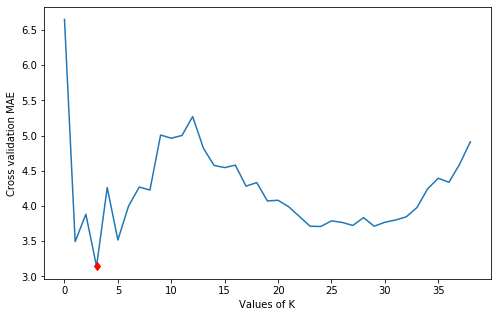

In [498]:
pl.figure(figsize=(8,5))
pl.xlabel("Values of K")
pl.ylabel("Cross validation MAE")
pl.plot(err)
plt.plot(best_k, err[best_k],'rd')

**Using the best value of k, demonstrate the functionality of your recommender by generating recommendations for several anecdotal users:**

In [528]:
# User A
target = 22
item = 8
pred = predict(target, item, 3, p_similarity)
print("User ", target)
print("Prediction:", pred)
print("Actual:",user_ratings[target][item])
print("-"*50)

# User B
target = 45
item = 3
pred = predict(target, item, best_k, p_similarity)
print("User ", target)
print("Prediction:", pred)
print("Actual:",user_ratings[target][item])
print("-"*50)

# User C
target = 68
item = 42
pred = predict(target, item, best_k, p_similarity)
print("User ", target)
print("Prediction:", pred)
print("Actual:",user_ratings[target][item])
print("-"*50)

# User D
target = 89
item = 5
pred = predict(target, item, best_k, p_similarity)
print("User ", target)
print("Prediction:", pred)
print("Actual:",user_ratings[target][item])
print("-"*50)

User  22
Prediction: 12.243333333333332
Actual: 10.71
--------------------------------------------------
User  45
Prediction: 7.376666666666666
Actual: 17.84
--------------------------------------------------
User  68
Prediction: 9.283333333333333
Actual: 11.73
--------------------------------------------------
User  89
Prediction: 3.546666666666667
Actual: 6.29
--------------------------------------------------
